In [27]:
import tensorflow as tf
import tensorflow.compat.v2 as tf
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [9]:
dataset,metadata = tfds.load('fashion_mnist',as_supervised = True, with_info=True)

Shuffling and writing examples to C:\Users\YASHRAJ\tensorflow_datasets\fashion_mnist\3.0.1.incomplete3SSY5F\fashion_mnist-train.tfrecord


Shuffling and writing examples to C:\Users\YASHRAJ\tensorflow_datasets\fashion_mnist\3.0.1.incomplete3SSY5F\fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to C:\Users\YASHRAJ\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


In [10]:
train_dataset, test_dataset = dataset['train'], dataset['test']

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [15]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples:     10000


In [16]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

# The map function applies the normalize function to each element in the train
# and test datasets
train_dataset =  train_dataset.map(normalize)
test_dataset  =  test_dataset.map(normalize)

# The first time you use the dataset, the images will be loaded from disk
# Caching will keep them in memory, making training faster
train_dataset =  train_dataset.cache()
test_dataset  =  test_dataset.cache()

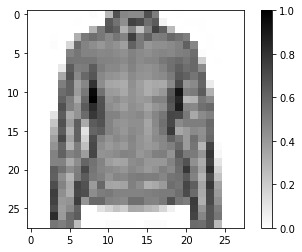

In [20]:
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

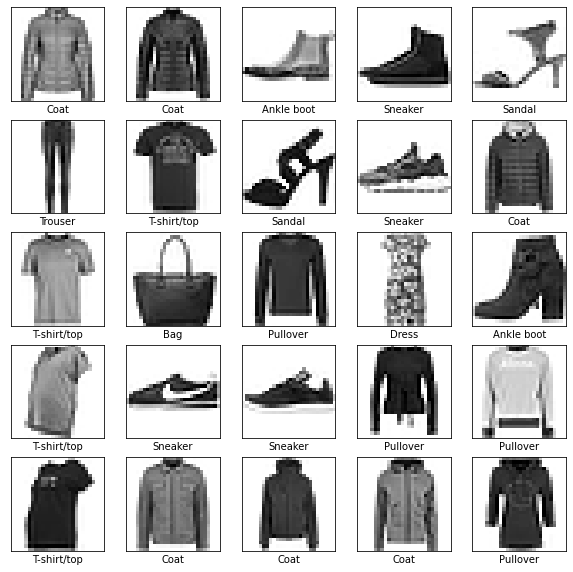

In [21]:
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [25]:
BATCH_SIZE = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.cache().batch(BATCH_SIZE)

In [28]:
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3931 - accuracy: 0.8573
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2634 - accuracy: 0.9052
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2169 - accuracy: 0.9214
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1850 - accuracy: 0.9322
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1558 - accuracy: 0.9434
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1332 - accuracy: 0.9510
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1148 - accuracy: 0.9578
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0966 - accuracy: 0.9640
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0795 - accuracy: 0.9702
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - l

In [29]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)

313/313 [==============================] - 2s 8ms/step - loss: 0.3204 - accuracy: 0.9205
Accuracy on test dataset: 0.9204999804496765


In [30]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [32]:
predictions.shape

(32, 10)

In [33]:
predictions[0]

array([7.8149220e-09, 6.9746565e-12, 1.1146832e-03, 3.7833871e-11,
       8.3621186e-01, 7.4532568e-12, 1.6267349e-01, 1.2923052e-11,
       8.5855247e-11, 4.5253434e-10], dtype=float32)

In [34]:
np.argmax(predictions[0])

4

In [35]:
test_labels[0]

4

In [36]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

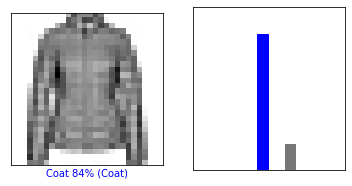

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

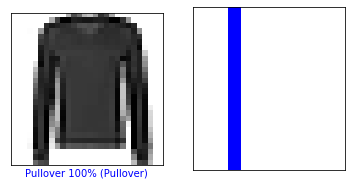

In [38]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)

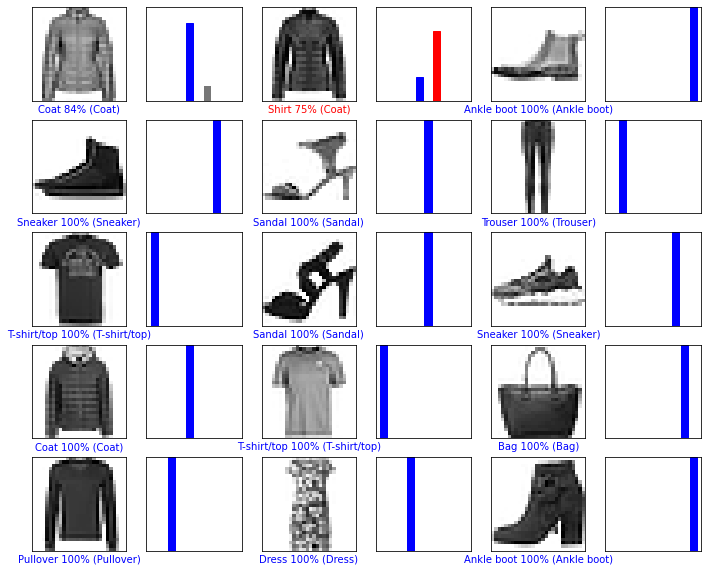

In [39]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
